In [1]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv("C:\\2cuatri_3\\Proyecto prediccion\\proyecto_Food_dataset\\ifood_proyecto_1\\data\\ml_project1_data.csv")

# Mostrar las primeras filas
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [2]:
df_estudiar=df.copy()
df_estudiar=df_estudiar.dropna(subset="Income")
df_estudiar.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [4]:
df_encoded = pd.get_dummies(df_estudiar, columns=["Marital_Status"], drop_first=False)

In [14]:
df_encoded['Total'] = df_estudiar['MntWines'] + df_estudiar['MntFruits'] + df_estudiar['MntMeatProducts'] + df_estudiar['MntFishProducts'] + df_estudiar['MntSweetProducts'] + df_estudiar['MntGoldProds']

In [7]:
df_encoded.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Total',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Total_Spending'],
      dtype='object')

In [15]:
df_bueno=df_encoded['Total'],df_encoded['Marital_Status_Divorced'],df_encoded['Marital_Status_Married']

In [16]:
avg_spending = {
    "Solteros": df_encoded.loc[df_encoded["Marital_Status_Single"] == 1, "Total"].mean(),
    "Casados": df_encoded.loc[df_encoded["Marital_Status_Married"] == 1, "Total"].mean(),
    
}

C:\Users\Victor Casas\AppData\Local\Temp\ipykernel_24320\2147215480.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_spending.keys()), y=list(avg_spending.values()), palette="coolwarm")


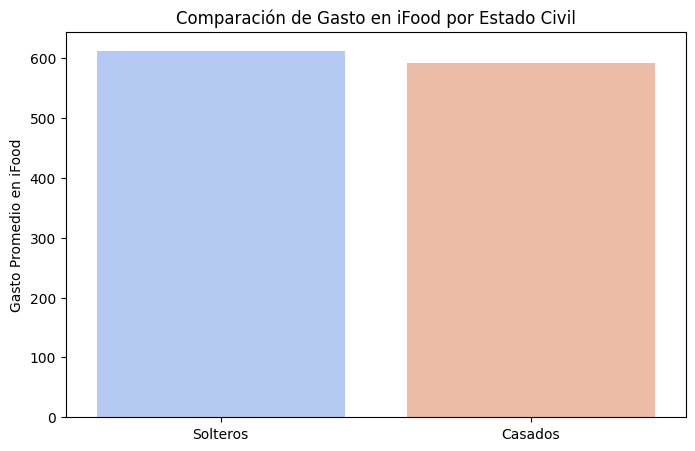

{'Solteros': np.float64(612.5923566878981), 'Casados': np.float64(591.4644107351226)}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_spending.keys()), y=list(avg_spending.values()), palette="coolwarm")
plt.ylabel("Gasto Promedio en iFood")
plt.title("Comparación de Gasto en iFood por Estado Civil")
plt.show()


print(avg_spending)